In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### Some basic exploratory data analysis

In [2]:
#Import data
df_list = []
for i in range(1880,2015):
    tempdf = pd.read_csv('names/yob{}.txt'.format(i),names=['Name','Sex','Count'])
    tempdf.insert(0,'Year',i)
    df_list.append(tempdf)

finaldf = pd.concat(df_list)
finaldf.head()

,Year,Name,Sex,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [3]:
finaldf.tail()

,Year,Name,Sex,Count
33039,2014,Zykeem,M,5
33040,2014,Zymeer,M,5
33041,2014,Zymiere,M,5
33042,2014,Zyran,M,5
33043,2014,Zyrin,M,5


In [4]:
#create indices
allyears_indexed = finaldf.set_index(['Sex','Name','Year']).sort_index()
allyears_indexed.head()

Count
Sex Name      Year       
F   Aabha     2011      7
              2012      5
              2014      9
    Aabriella 2008      5
              2014      5

In [5]:
#Create a helper function for plotting
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    plt.plot(data.index,data.values)

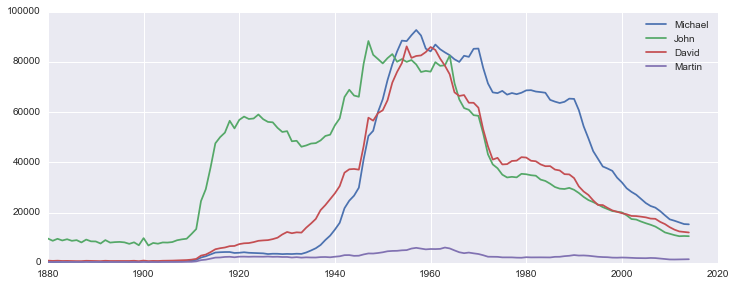

In [6]:
plt.figure(figsize=(12,4.5))
names = ['Michael','John','David','Martin']
for name in names:
    plotname('M',name)
plt.legend(names)

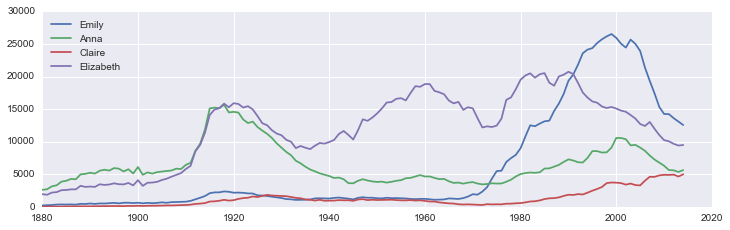

In [7]:
#Test helper function on some names
plt.figure(figsize=(12,3.5))
names = ['Emily','Anna','Claire','Elizabeth']
for name in names:
    plotname('F',name)
plt.legend(names, loc='upper left')

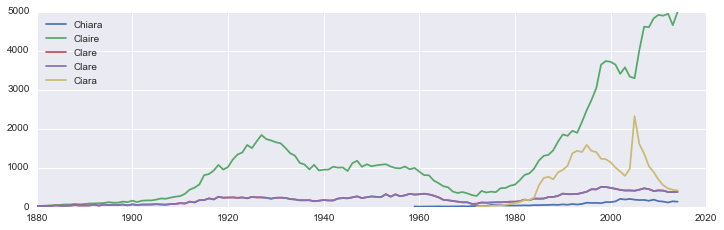

In [8]:
##...and some more with different variations of Claire
plt.figure(figsize=(12,3.5))
claires = ['Chiara','Claire','Clare','Clare','Ciara']
for name in claires:
    plotname('F',name)
plt.legend(claires, loc='upper left')

In [9]:
#Create stacked plots for Claire's
variants = allyears_indexed.loc['F'].loc[claires].unstack(level=0).fillna(0)

In [10]:
variants.head()

Count                   
Name Chiara Ciara Claire Clare
Year                          
1880    0.0   0.0   21.0  15.0
1881    0.0   0.0   23.0  20.0
1882    0.0   0.0   30.0  21.0
1883    0.0   0.0   38.0  22.0
1884    0.0   0.0   33.0  38.0

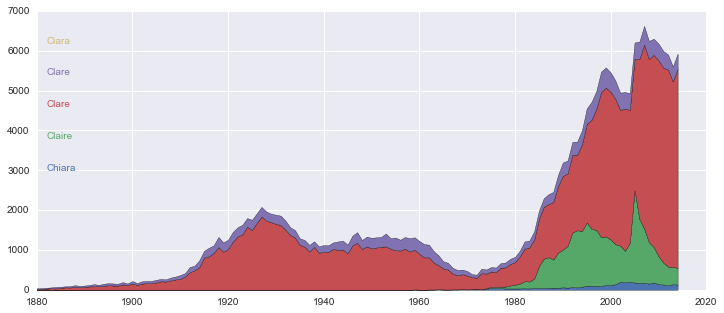

In [11]:
#Run stackplot
plt.figure(figsize=(12,5))
palette = seaborn.color_palette()
plt.stackplot(variants.index,variants.values.T,colors=palette)
for i,name in enumerate(claires):
    plt.text(1882, 3000 + 800*i,name,color=palette[i])

In [12]:
#Popular names
pop2008 = allyears_indexed.loc['M',:,2008].sort_values(by='Count',ascending=False).head()

In [13]:
pop2008.reset_index().drop(['Sex','Year','Count'],axis=1)

,Name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [14]:
#Helper function to retrieve top10 names for a given year
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values(by='Count',ascending=False)
    simple = simple.reset_index().drop(['Sex','Year','Count'],axis=1).head(10)
    simple.columns = [year]
    simple.index = simple.index + 1
    return simple

In [15]:
topten('F',2000)

,2000
1,Emily
2,Hannah
3,Madison
4,Ashley
5,Sarah
6,Alexis
7,Samantha
8,Jessica
9,Elizabeth
10,Taylor


In [16]:
##Extended for a range of years
def toptens(sex,year1,yearn):
    years = [topten(sex,year) for year in range(year1, yearn+1)]
    return years[0].join(years[1:])

In [17]:
popular = toptens('M',2004,2012).stack().head(100).value_counts().index[:6]

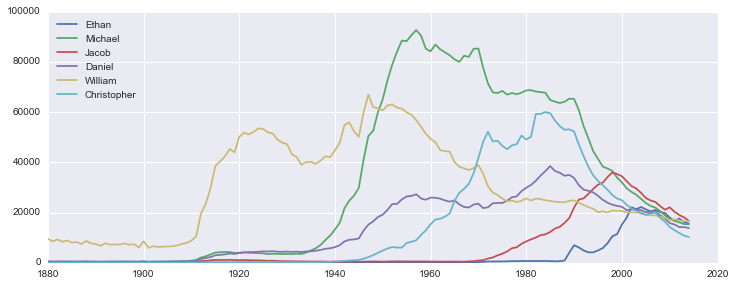

In [18]:
#Plotting popular names
plt.figure(figsize=(12,4.5))
for name in popular:
    plotname('M',name)

plt.legend(popular, loc='upper left')

### Determine names that are only popular during a given period of time and eventually fall out of style.

In [19]:
totals = finaldf.groupby(['Sex','Name'])['Count'].sum()

In [20]:
def sumsq(x):
    return sum(x**2)

In [21]:
spikiness = finaldf.groupby(['Sex','Name'])['Count'].agg(sumsq)/totals**2

In [22]:
common = spikiness[totals > 5000].copy()
common.sort_values(ascending=False, inplace=True)
common.head(10)

Sex  Name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: Count, dtype: float64

In [23]:
fads = common.head(10).index.values

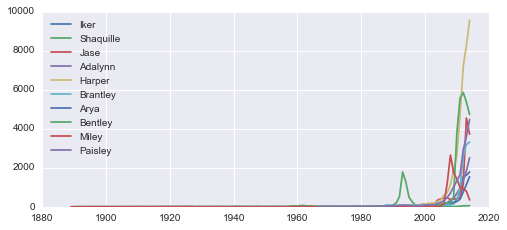

In [24]:
plt.figure(figsize=(8,3.5))
for sex, name in fads:
    plotname(sex,name)
plt.legend([name for sex, name in fads],loc='upper left')

### Determining most popular unisex names

In [25]:
totals = finaldf.groupby(['Sex','Name'])['Count'].sum()

In [26]:
totals_bysex = totals.unstack('Sex')

In [27]:
totals_both = totals_bysex.sum(axis=1)

In [28]:
ratio = totals_bysex['F']/totals_bysex['M']

In [29]:
ratio.head()

Name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [30]:
unisex = (ratio > 0.25) & (ratio < 4)

In [31]:
totals_both = totals_both[unisex]
totals_both.sort_values(ascending=False, inplace=True)

In [32]:
uninames = totals_both.head(10).index.values

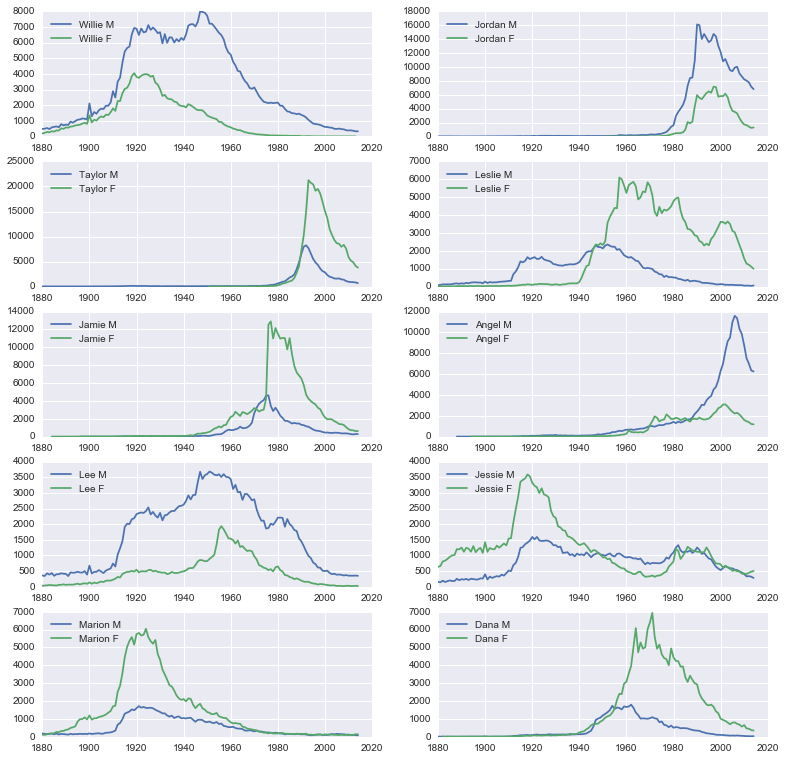

In [33]:
plt.figure(figsize=(13,13))
for i,name in enumerate(uninames):
    plt.subplot(5,2,i+1)
    plotname('M',name)
    plotname('F',name)
    plt.legend([name+' M',name+' F'], loc='upper left')
